In [1]:
from scipy.stats import norm
import numpy as np

class BSM:
    def __init__(self,S,K,T,r,q,sigma,payoff='Call'):
        #S: spot price
        #K: strike price
        #T: time to maturity
        #r: interest rate
        #q: dividend rate
        #sigma: volatility of underlying asset
        #payoff: option type, possible values : 'Call','Put','BinCall','BinPut'
        self.S = S
        self.K = K
        self.r = r
        self.q = q
        self.T = T
        self.sigma = sigma
        self.payoff = payoff
        self.d1 = (np.log(S / K) + T*(r - q + 0.5 * sigma ** 2)) / (sigma * np.sqrt(T))
        self.d2 = self.d1 - sigma*np.sqrt(self.T)
        
    def information(self):
        print('Payoff = ',self.payoff)
        print('Price = ',self.price())
        print('Delta = ',self.delta())
        print('Gamma = ',self.gamma())
        print('Vega = ',self.vega())
        print('Theta = ',self.theta())
        print('rho = ',self.rho())
    
    def price(self):
        if self.payoff == 'Call':
            return self.S*np.exp(-self.q*self.T)*norm.cdf(self.d1, 0.0, 1.0) - self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2, 0.0, 1.0)
        elif self.payoff == 'Put':
            return -self.S*np.exp(-self.q*self.T)*norm.cdf(-self.d1, 0.0, 1.0) + self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2, 0.0, 1.0)
        elif self.payoff == 'BinCall':
            return np.exp(-self.r*self.T)*norm.cdf(self.d2, 0.0, 1.0)
        else:
            return np.exp(-self.r*self.T)*norm.cdf(-self.d2, 0.0, 1.0)
        
    def delta(self):
        if self.payoff == 'Call':
            return np.exp(-self.q*self.T)*norm.cdf(self.d1)
        elif self.payoff == 'Put':
            return np.exp(-self.q*self.T)*(norm.cdf(self.d1)-1)
        elif self.payoff == 'BinCall':
            N_prime = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
            return np.exp(-self.r*self.T)*N_prime/(self.S * self.sigma * np.sqrt(self.T))
        else:
            N_prime = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
            return -np.exp(-self.r*self.T)*N_prime/(self.S * self.sigma * np.sqrt(self.T))

    def gamma(self):
        N_prime = np.exp(-self.d1**2/2)/np.sqrt(2*np.pi)
        N_prime2 = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
        if self.payoff == 'Call' or self.payoff == 'Put':
            return np.exp(-self.q*self.T)*N_prime/(self.S * self.sigma * np.sqrt(self.T))
        elif self.payoff == 'BinCall':
            return -np.exp(-self.r*self.T)*N_prime2*self.d1/(self.S**2 * self.sigma**2 * self.T)
        else:
            return np.exp(-self.r*self.T)*N_prime2*self.d1/(self.S**2 * self.sigma**2 * self.T)
        
    
    def vega(self):
        N_prime = np.exp(-self.d1**2/2)/np.sqrt(2*np.pi)
        N_prime2 = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
        if self.payoff == 'Call' or self.payoff == 'Put':
            return self.S*np.exp(-self.q*self.T)*np.sqrt(self.T)*N_prime 
        elif self.payoff == 'BinCall':
            return -np.exp(-self.r*self.T)*N_prime2*self.d1/(self.sigma)
        else:
            return np.exp(-self.r*self.T)*N_prime2*self.d1/(self.sigma)

    def theta(self):
        N_prime = np.exp(-self.d1**2/2)/np.sqrt(2*np.pi)
        common = self.sigma*self.S*np.exp(-self.q*self.T)/(2*np.sqrt(self.T))
        N_prime2 = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
        common2 = N_prime2*(np.log(self.S/self.K)-self.T*(self.r - self.q - 0.5 * self.sigma ** 2))/(2*self.sigma*self.T**(3/2))
        if self.payoff == 'Call':
            return common*N_prime - self.q*self.S*np.exp(-self.q*self.T)*norm.cdf(self.d1) + self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2) 
        elif self.payoff == 'Put':
            return common*N_prime + self.q*self.S*np.exp(-self.q*self.T)*norm.cdf(-self.d1) - self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2)
        elif self.payoff == 'BinCall':
            N_prime = np.exp(-self.d1**2/2)/np.sqrt(2*np.pi)
            common = self.sigma*self.S*np.exp(-self.q*self.T)/(2*np.sqrt(self.T))
            N_prime2 = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
            common2 = N_prime2*(np.log(self.S/self.K)-self.T*(self.r - self.q - 0.5 * self.sigma ** 2))/(2*self.sigma*self.T**(3/2))
            return np.exp(-self.r*self.T)*(common2 + self.r*norm.cdf(self.d2, 0.0, 1.0))
        else:
            return np.exp(-self.r*self.T)*(-common2 + self.r*norm.cdf(-self.d2, 0.0, 1.0))
            
    def rho(self):
        N_prime2 = np.exp(-self.d2**2/2)/np.sqrt(2*np.pi)
        if self.payoff == 'Call':
            return self.T*self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2)
        elif self.payoff == 'Put':
            return -self.T*self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2)
        elif self.payoff == 'BinCall':
            return np.exp(-self.r*self.T)*(np.sqrt(self.T)*N_prime2/self.sigma - self.T*norm.cdf(self.d2, 0.0, 1.0))
        else:
            return np.exp(-self.r*self.T)*(-np.sqrt(self.T)*N_prime2/self.sigma - self.T*norm.cdf(self.d2, 0.0, 1.0))

In [2]:
def newton_raphson(Mkt,S,K,T,r,q,_type):
    x_old = -1
    x_new = np.sqrt(2/T*abs(np.log(S*np.exp((r-q)*T)/K)))
    tolerance = 10**(-8)
    while abs(x_new-x_old)>tolerance :
        x_old = x_new
        c = BSM(S,K,T,r,q,x_new,_type)
        x_new = x_new - (c.price()-Mkt)/(c.vega())
    return x_new

def bissection(Mkt,S,K,T,r,q,_type):
    threshold = 10**(-8)
    x = 0
    y = 1
    f = lambda x : x/(1-x)
    while abs(BSM(S,K,T,r,q,f((x+y)/2),_type).price()-Mkt)>threshold:
        if BSM(S,K,T,r,q,f((x+y)/2),_type).price() > Mkt :
            y = (x+y)/2
        else :
            x = (x+y)/2
    return f((x+y)/2)

In [5]:
newton_raphson(BSM(100,100,0.5,0.05,0.01,0.4,'Call').price(),100,100,0.5,0.05,0.01,'Call')

0.3999999999999996

In [3]:
class BarrierOptions:
    def __init__(self,S,K,T,r,q,sigma,D,payoff='DIC'):
       # payoff : BinDIC,DIC,DOC
       #S: spot price
       #K: strike price
       #T: time to maturity
       #r: interest rate
       #q: dividend rate
       #sigma: volatility of underlying asset
        self.S = S
        self.K = K
        self.r = r
        self.q = q
        self.T = T
        self.sigma = sigma
        self.D = D
        self.payoff = payoff
        self.gamma = 1-2*(self.r-self.q)/(self.sigma**2)
       
    def price(self):
        if self.payoff == 'DOC':
            a = BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'Call').price()
            b = BarrierOptions(self.S,self.K,self.T,self.r,self.q,self.sigma,self.D,'DIC').price()
            return a - b
        if self.payoff == 'BinDOC':
            a = BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'BinCall').price()
            b = BarrierOptions(self.S,self.K,self.T,self.r,self.q,self.sigma,self.D,'BinDIC').price()
            return a - b
        
        
        if self.D <= self.K and self.S <= self.D :
            if self.payoff == 'DIC':
                #S,K,T,r,q,sigma
                return BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'Call').price()
            if self.payoff == 'BinDIC':
                return BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'BinCall').price()
        
        if self.D <= self.K and self.S > self.D :
            if self.payoff == 'DIC':
                #S,K,T,r,q,sigma
                return (self.S/self.D)**(self.gamma-1)*BSM(self.D,self.S*self.K/self.D,self.T,self.r,self.q,self.sigma,'Call').price()
            if self.payoff == 'BinDIC':
                return (self.S/self.D)**(self.gamma)*BSM(self.D,self.S*self.K/self.D,self.T,self.r,self.q,self.sigma,'BinCall').price()
            
        if self.D > self.K and self.S > self.D :
            if self.payoff == 'BinDIC':
                #S,K,T,r,q,sigma
                a = BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'BinCall').price()
                b = - np.exp(-self.r*self.T)
                c = BSM(self.S,self.D,self.T,self.r,self.q,self.sigma,'BinPut').price()
                d = BarrierOptions(self.S,self.D,self.T,self.r,self.q,self.sigma,self.D,'BinDIC')
                return a+b+c+d
            if self.payoff == 'DIC':
                a = BSM(self.S,self.K,self.T,self.r,self.q,self.sigma,'Call').price()
                b = - BSM(self.S,self.D,self.T,self.r,self.q,self.sigma,'Call').price()
                c = -(self.D-self.K)*BSM(self.S,self.D,self.T,self.r,self.q,self.sigma,'BinCall').price()
                d = BarrierOptions(self.S,self.D,self.T,self.r,self.q,self.sigma,self.D,'DIC')
                e = (self.D-self.K)*BarrierOptions(self.S,self.D,self.T,self.r,self.q,self.sigma,self.D,'BinDIC')
                return a+b+c+d+e
   

In [30]:
BSM(90,100*100/90,0.5,2/100,2/100,20/100,'Call').price()

0.41900357477527983

In [21]:
S_0=93.560000
T=0.044000
K=94.270000
r=0.01
q=0.02
sigma=0.140900
D = 80
BSM(S_0,K,T,r,q,sigma,'Call').price()

0.7714492184863886

In [22]:
S_0=93.560000
T=0.044000
K=94.270000
r=0.01
q=0.021
sigma=0.140900
D = 80
BSM(S_0,K,T,r,q,sigma,'Call').price()

0.7698092877728229

In [35]:
S_0=10.800000
T=0.459000
K=10.790000
r=0
q=0
sigma=0.294700
S_0*BSM(S_0*(np.exp(sigma**2*T)),K,T,r,q,sigma,'Call').price()

12.081331304819921

In [45]:
##BinCall
S_0=95.62+17
T=0.226
K=97.13+17
D=90.96+17
r=0
q=0
sigma=0.2205
#gamma = 1-2*(r-q)/(sigma**2)
BSM(D,K*S_0/D,T,r,q,sigma,'Call').price()


1.1214207378999994

In [5]:
S_0=99.090000
T=0.564000
K=99.100000
D=93.550000
r=0.010000
q=0.065000
sigma=0.251700
BSM(S_0,K,T,r,q,sigma,'DIC').price()

0.5988535823619917

In [9]:
# Put Vega
S_0=99.940000
T=0.012000
K=95.220000
r=0.100000
q=0.031000
sigma=0.188700
BSM(S_0,K,T,r,q,sigma,'Put').information()

Payoff =  Put
Price =  0.005811506813108491
Delta =  0.00840128456839487
Gamma =  0.011076024180682442
Vega =  0.25050461524749335
Theta =  1.9110773044982936
rho =  -0.010145230638941903


In [39]:
#Log displaced
S_0=94.600000
T=0.435000
K=97.560000
r=0.000000
q=0.000000
sigma=0.292700
a=40.750000
newton_raphson(BSM(S_0+a,K+a,T,r,q,sigma,'Call').price(),S_0,K,T,r,q,'Call')*100

41.75274280821851

In [60]:
S_0=99.460000
K=99.050000
r=0.005000
x=1.710000
y=2.750000
u = 1 + x/100
d = 1 - y/100
p = (1+r - d)/(u-d)


In [61]:
UU = max(u*u*S_0-K,0)
UD = max(u*d*S_0-K,0)
DD = max(d*d*S_0-K,0)

In [62]:
UU,UD,DD

(3.8406150985999687, 0, 0)

In [63]:
U =  U2*p/(1+r) + UD*(1-p)/(1+r)
D = UD*p/(1+r) + DD*(1-p)/(1+r)
C = U*p/(1+r) + D*(1-p)/(1+r)

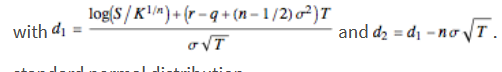

In [7]:
n=2
S_0=0.970000
T=0.339000
K=0.910000
r=0.095000
q=0.030000
sigma=0.106500

def powercall(S,K,T,r,q,sigma,n):
    d1 = (np.log(S / K**(1/n)) + T*(r - q + (n-0.5) * sigma ** 2)) / (sigma * np.sqrt(T))
    d2 = d1 - n*sigma*np.sqrt(T)
    c = S**n*np.exp(((n-1)*(r+n*sigma**2/2) -n*q)*T)*norm.cdf(d1, 0.0, 1.0) - K*np.exp(-r*T)*norm.cdf(d2, 0.0, 1.0)
    return c

In [8]:
powercall(S_0,K,T,r,q,sigma,n)

0.09213838809261488

In [76]:
-0.114000*0.127000 -0.288000*0.258000

-0.088782

In [39]:
S2=98.160000
T=0.275000
K1=109.510000
K2=94.180000
r=0.056000
q=0.069000
sigma2=0.140500
-2*BSM(S2,K1,T,r,q,sigma2,'Call').delta()/BSM(S2,K2,T,r,q,sigma2,'Call').delta()

-0.18968410875800257

In [53]:
S1=103.270000
S2=102.330000
T=0.694000
K=1.029000
r=0.054000
sigma1=0.165300
sigma2=0.132000
rho=-0.320000
S1*BSM(S2/S1,K,T,0,0,(sigma1**2+sigma2**2-2*rho*sigma1*sigma2)**(0.5),'Call').price()

6.562915450918508

In [10]:
S_0=101.940000
T=0.663000
K=101.100000
r=0.007000
q=0.042000
sigma=0.217800
T2 = 0.422

delta2 = BSM(S_0,K,T,r,q,sigma).delta()
delta2/(np.exp((r-q)*T2))


0.49526880503763815

In [5]:
S_0=9.310000
T=0.371000
K=9.080000
r=0.002000
q=0.097000
sigma=0.250600
T2 = 0.325000

delta2 = -91*BSM(S_0,K,T,r,q,sigma).delta()
delta2/(np.exp((r-q)*T2))-5

-50.603852099675045

In [8]:
S1=98.610000
S2=91.340000
T=0.305000
K1=100.040000
K2=107.380000
r=0.093000
sigma1=0.294600
sigma2=0.158500
rho=0.660000

C1 = 64.937624
C2 = -626.337137
delta2 = C2 * BSM(S2,K2,T,r,q,sigma2).delta()
N_d1_ne = delta2/(np.exp((r-q)*T))
N_d1_ne

delta1 = C1 * BSM(S1,K1,T,r,q,sigma1).delta()
N_d0_ne = delta1/(np.exp((r-q)*T))

In [9]:
N_d1_ne

-21.004550158170666

In [10]:
N_d0_ne

31.192096015264784

In [13]:
r1 = 0.00580000
r2 = 0.00830000
r3 = 0.01130000
r4 = 0.01310000
r5 = 0.01560000
O = 27972
O*(r1)+(r2)**2+(r3)**3+(r4)**4+(r5)**5+O



28134.237670363273

In [3]:
%cd ~/

/Users/zigong


In [4]:
%cd Desktop/

/Users/zigong/Desktop


In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv('df1.csv', sep = ';')

In [12]:
df.head()

,Date,Spot,Unnamed: 2
0,0.000000,101.910000,NaN
1,0.003393,101.204426,NaN
2,0.006787,100.680752,NaN
3,0.010180,101.339600,NaN
4,0.013574,102.427541,NaN


In [17]:
df.to_csv('df.csv')